# Health Care Cost Prediction with Linear Regression Models

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading And Understanding Data

In [25]:
cost = pd.read_csv('datasets/Health_insurance.csv')

In [26]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Age: insurance contracter age, years
* Sex: insurance contracter gender
* BMI: Body mass index (kg / m^2), providing an understanding of body. Ideally 18.5 to 24.9.
* Children: number of children covered by health insurance / Number of dependents.
* Smoker: smoking (yes / no)
* Region: the beneficiary's residential areas in the US.
* Charges: individual medical cost billed by health insurance

### Exploratory Data Analysis

In [27]:
sns.set_style('whitegrid')


<Figure size 1440x1224 with 0 Axes>

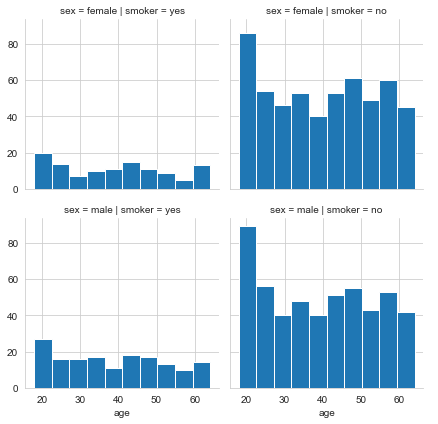

In [28]:
plt.figure(figsize = (20, 17))
g = sns.FacetGrid(cost, col = 'smoker', row = 'sex')
g = g.map(plt.hist,'age').add_legend()

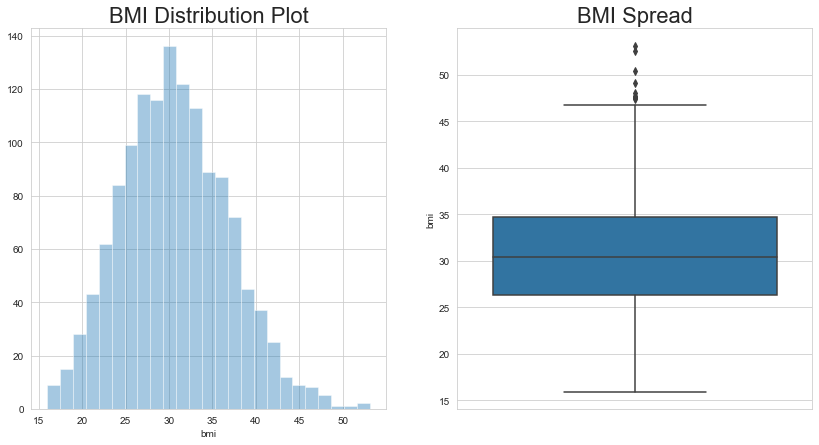

In [6]:
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
plt.title('BMI Distribution Plot', fontsize = 22)
sns.distplot(cost['bmi'], kde = False)

plt.subplot(1, 2, 2)
plt.title('BMI Spread', fontsize = 22)
sns.boxplot(y=cost.bmi)

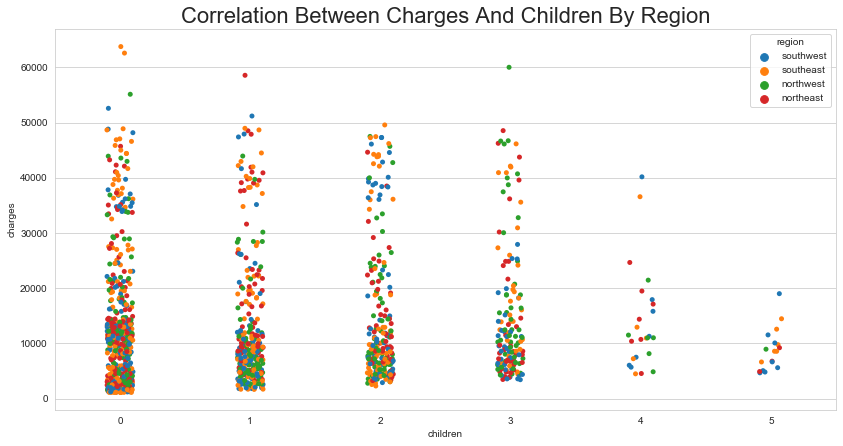

In [7]:
plt.figure(figsize = (14, 7))
plt.subplot(1,1,1)
plt.title('Correlation Between Charges And Children By Region', fontsize = 22)
sns.stripplot(x ='children',y='charges', data = cost, hue = 'region')

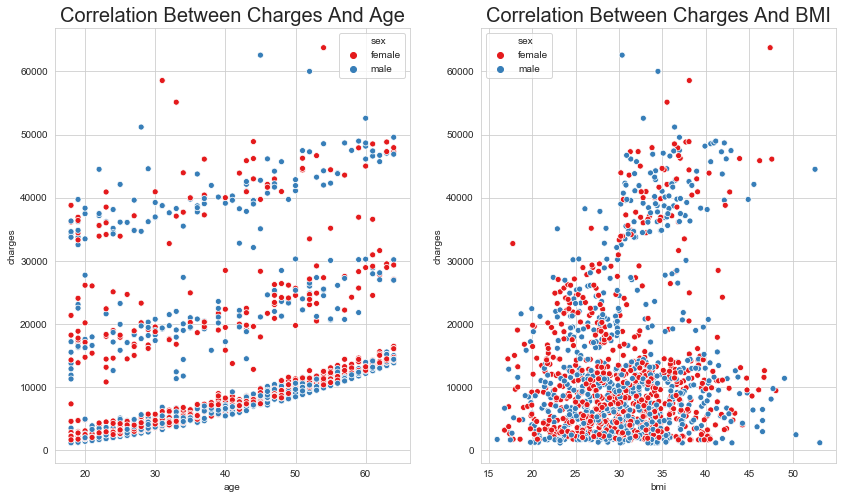

In [8]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.title('Correlation Between Charges And Age', fontsize = 20)
sns.scatterplot(x = 'age',y='charges', data = cost,hue = 'sex', palette='Set1')

plt.subplot(1, 2, 2)
plt.title('Correlation Between Charges And BMI', fontsize = 20)
sns.scatterplot(x='bmi',y='charges', data = cost,hue ='sex', palette='Set1')



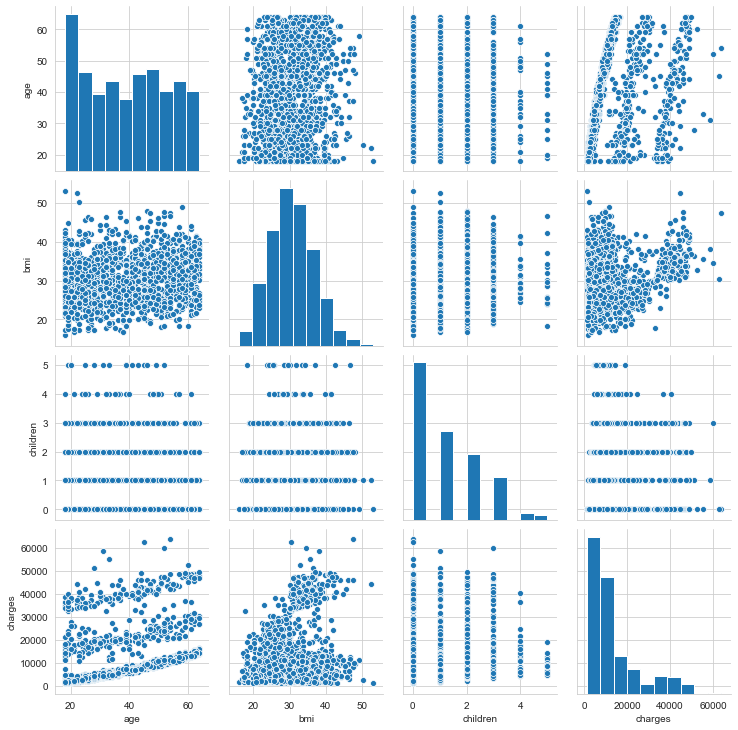

In [9]:
sns.pairplot(cost)

### Preparing and splitting the data

Converting Categorical features

In [10]:
sex = pd.get_dummies(cost['sex'], drop_first= True)
smoker = pd.get_dummies(cost['smoker'], drop_first= True)
region = pd.get_dummies(cost['region'], drop_first= True)


In [11]:
cost.drop(['sex', 'smoker', 'region'], axis = 1, inplace= True)

cost = pd.concat([cost, sex, smoker, region], axis = 1)

In [12]:
cost.head(3)

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [13]:
cost.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Building a Logistic Regression model

In [14]:
from sklearn.model_selection import train_test_split
X = cost.drop('charges', axis = 1)
y = cost['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
predictions = lm.predict(X_test)

### Evaluation

In [19]:
print("Test set accuracy: {:.2f}".format(lm.score(X_test, y_test)))

Test set accuracy: 0.76


In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3987.9628476976304
MSE: 33683659.32465648
RMSE: 5803.762514494927


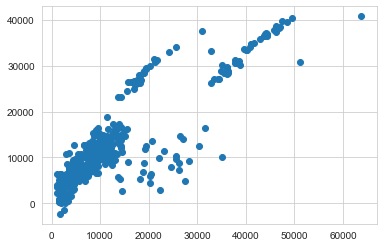

In [21]:
plt.scatter(y_test, predictions, )

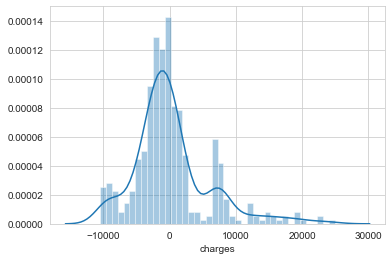

In [22]:
sns.distplot((y_test-predictions), bins = 40)